In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore') # Disabling warnings for clear outputs

pd.options.display.max_columns = 50 # Pandas option to increase max number of columns to display

plt.style.use('ggplot') # Setting default plot style

In [25]:
# Importing the datasets

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

idx = len(train)

In [26]:
display(train.sample(3))
display(test.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.70,G6,S
158,1050,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.55,D22,S


In [27]:
# Merging the dataset

train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)
merged_data = pd.concat([train,test], sort = False).reset_index(drop = True)

In [28]:
# viewing the shape of merged data
display(merged_data.shape)

(1309, 11)

In [33]:
# Viewing the feature and target columns 
display(merged_data.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
# checking the dtypes
display(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


None

## Exploring the Data

#### Categorical Features

* **Survived**: It is the target variable, which represents whether the people survived or not.

In [41]:
# Selecting the categorical data
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [58]:
def plotFrequency(cats):
    # Plots for visualizing categorical data
    fig, axes = plt.subplots(math.ceil(len(cats)/3), 3, figsize = (20,12))
    axes = axes.flatten()
    
    for ax, cat in zip(axes,cats):
        if cat == 'Survived':
            total = float(len(train[cat]))
        else:
            total = float(len(merged_data[cat]))
        sns.countplot(merged_data[cat], palette = 'plasma', ax = ax)
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 10 , '{:1.2f}%'.format((height/total) * 100), ha = 'center')
        
       
        plt.ylabel('Count', fontsize = 15, weight = 'bold')

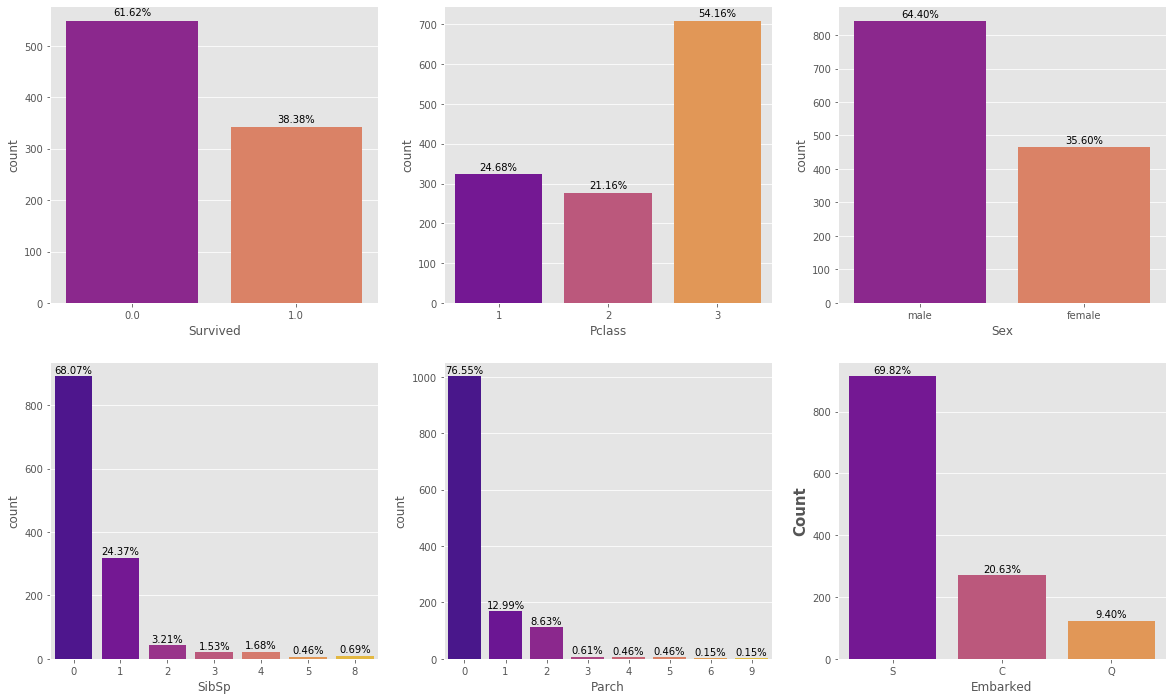

In [59]:
plotFrequency(cats)

In [60]:
def plotsurvival(cats, data):
    # plot for bivariate analysis
    fig, axes = plt.subplots(math.ceil(len(cats)/3),3, figsize = (20,12))
    axes = axes.flatten()
    
    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            sns.countplot(train[cat], palette = 'plasma', ax = ax)
        else:
            sns.countplot(x=cat, data = data, hue = 'Survived', palette = 'plasma', ax=ax)
            ax.legend(title='Survived', loc = 'upper right', labels = ['No','Yes'])
        plt.ylabel('Count', fontsize = 15, weight = 'bold')

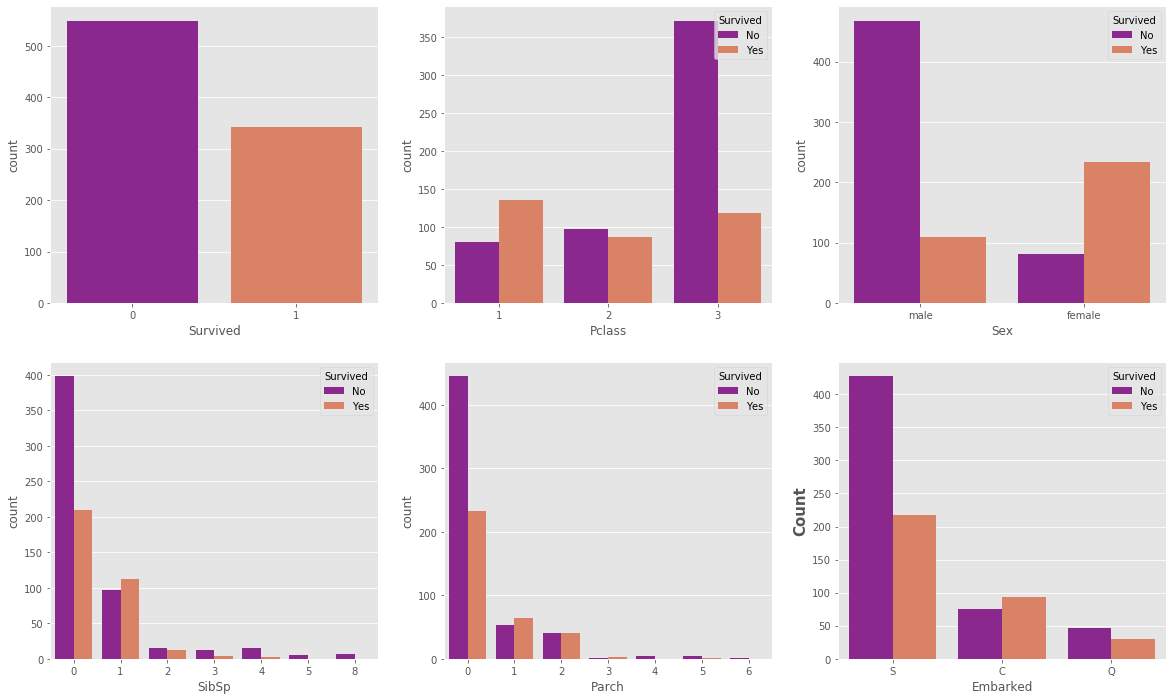

In [61]:
plotsurvival(cats,train)

#### Numerical Features

In [62]:
def plot_3chart(df, feature):
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    
    # Creating a customized chart
    fig = plt.figure(constrained_layout = True, figsize = (12,8))
    # creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    # customizing the histogram grid
    ax1 = fig.add_subplot(grid[0,:2])
    # Set the title
    ax1.set_title('Histogram')
    # plot the histogram
    sns.distplot(df.loc[:, feature], hist = True, kde = True, fit = norm, ax = ax1, color = '#e12c4c')
    ax1.legend(labels = ['Normal','Actual'])
    
    # Customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1,:2])
    ax2.set_title('Probability Plot')
    stats.probplot(df.loc[:,feature].fillna(np.mean(df.loc[:,feature])), plot = ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{feature}', fontsize=24)
    
    

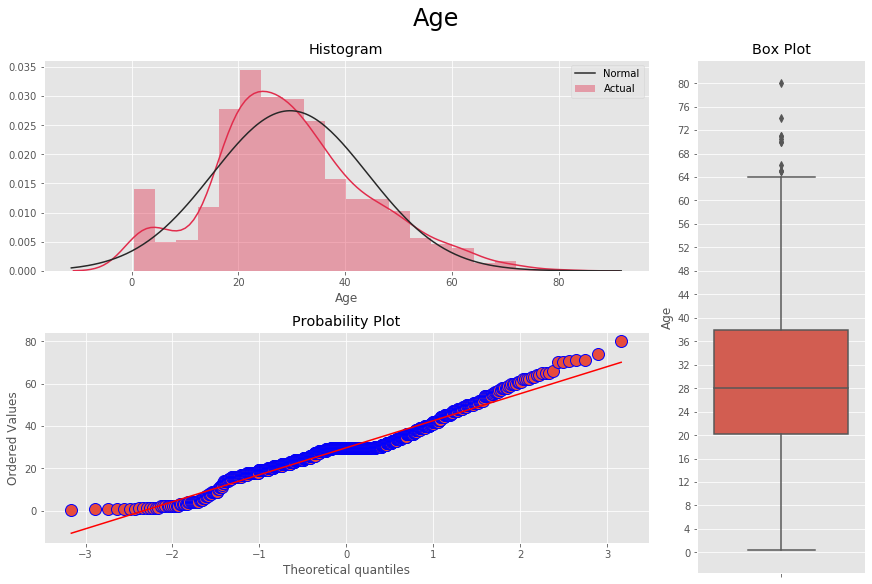

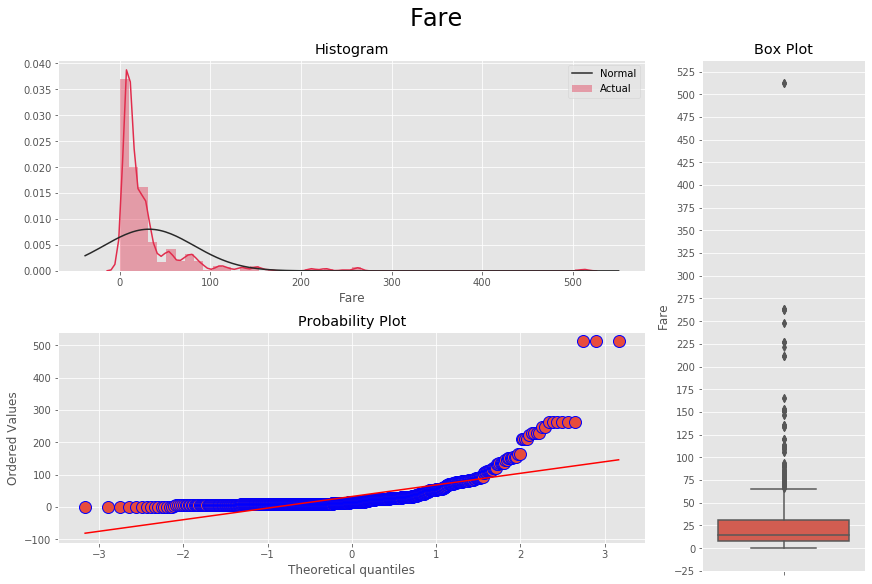

In [64]:
plot_3chart(train, 'Age')
plot_3chart(train, 'Fare')

In [72]:
# Listing most related continous values to target
train_corr = train[['Survived','Age','Fare']].corr(method = 'spearman').abs().unstack().sort_values(
    kind = 'quicksort', ascending = False).reset_index()
train_corr.rename(columns = {'level_0':'Feature A','level_1':'Feature B', 0:'Correlation Coefficient'},inplace = True)
train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(cmap = 'summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Survived,Survived,1.000000
4,Survived,Fare,0.323736
8,Survived,Age,0.052565


#### Missing values

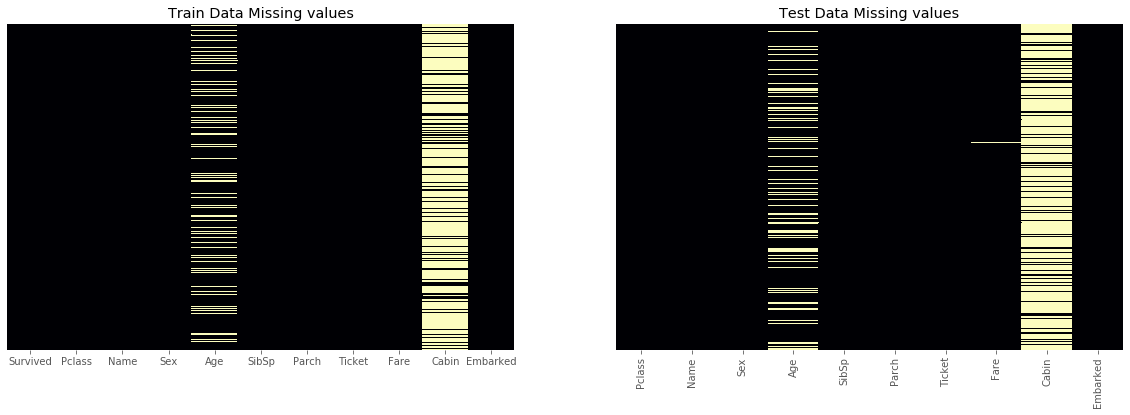

In [90]:
# Detecting the missing values

fig, ax = plt.subplots(ncols = 2, figsize = (20,6))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'magma', ax=ax[0])
sns.heatmap(test.isnull(), yticklabels= False, cbar = False, cmap = 'magma', ax=ax[1])

ax[0].set_title('Train Data Missing values')
ax[1].set_title('Test Data Missing values')
plt.xticks(rotation= 90)
plt.show()

## Feature Engineering

In [91]:
def status(feature):
    print('Processing', feature, ': DONE')
    print(f'Shape after processing {combined.shape}')
    print('*' * 40)

In [100]:
def get_combined_data():
    # Reading training data
    train = pd.read_csv("train.csv")
    # REading test data
    test = pd.read_csv("test.csv")
    
    # Extracting the target variable
    targets = train.Survived

    # Merging both datasets
    combined = train.append(test)
    combined.reset_index(inplace = True, drop = True)
    return combined

Calculating the family size from Parch and SibSp features

In [102]:
def process_family():
    global combined
    
    # Introducing new feature 'FamilySize'
    combined['FamilySize'] = combined['Parch'] + combined['SibSp']+1
    
    # Introducing another feature based on family size
    combined['Alone'] = combined['FamilySize'].map(lambda s:1 if s==1 else 0)
    
    status('Family')
    return combined

In [103]:
def family_survival():
    global combined

    # A function working on family survival rate using last names and ticket features

    # Extracting surnames
    combined['Last_Name'] = combined['Name'].apply(
        lambda x: str.split(x, ",")[0])

    # Adding new feature: 'Survived'
    default_survival_rate = 0.5
    combined['Family_Survival'] = default_survival_rate

    for grp, grp_df in combined[[
            'Survived', 'Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
            'SibSp', 'Parch', 'Age', 'Cabin'
    ]].groupby(['Last_Name', 'Fare']):

        if (len(grp_df) != 1):
            # A Family group is found.
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combined.loc[combined['PassengerId'] ==
                                 passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    combined.loc[combined['PassengerId'] ==
                                 passID, 'Family_Survival'] = 0

    for _, grp_df in combined.groupby('Ticket'):
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (
                        row['Family_Survival'] == 0.5):
                    smax = grp_df.drop(ind)['Survived'].max()
                    smin = grp_df.drop(ind)['Survived'].min()
                    passID = row['PassengerId']
                    if (smax == 1.0):
                        combined.loc[combined['PassengerId'] ==
                                     passID, 'Family_Survival'] = 1
                    elif (smin == 0.0):
                        combined.loc[combined['PassengerId'] ==
                                     passID, 'Family_Survival'] = 0

    status('FamilySurvival')
    return combined

In [104]:
def get_titles():

    title_dictionary = {
        'Capt': 'Dr/Clergy/Mil',
        'Col': 'Dr/Clergy/Mil',
        'Major': 'Dr/Clergy/Mil',
        'Jonkheer': 'Honorific',
        'Don': 'Honorific',
        'Dona': 'Honorific',
        'Sir': 'Honorific',
        'Dr': 'Dr/Clergy/Mil',
        'Rev': 'Dr/Clergy/Mil',
        'the Countess': 'Honorific',
        'Mme': 'Mrs',
        'Mlle': 'Miss',
        'Ms': 'Mrs',
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Lady': 'Honorific'
    }

    # Extract the title from names
    combined['Title'] = combined['Name'].map(
        lambda name: name.split(',')[1].split('.')[0].strip())

    # Mapping titles
    combined['Title'] = combined.Title.map(title_dictionary)
    status('Title')
    return combined

In [105]:
def process_names():
    global combined
    # Cleaning the Name variable
    combined.drop('Name', axis=1, inplace=True)

    # Encoding names as dummy variables
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)

    # Removing the title variable after getting dummies
    combined.drop('Title', axis=1, inplace=True)

    status('names')
    return combined

In [106]:
# Age groups

def age_binner():
    global combined
    # Ranging and grouping Ages
    #bins = [0, 2, 18, 35, 65, np.inf]
    names = ['less2', '2-18', '18-35', '35-65', '65plus']

    #combined['AgeBin'] = pd.cut(combined['Age'], bins, labels=names)
    combined['AgeBin'] = pd.qcut(combined['Age'],q = 5, labels = names)
    age_dummies = pd.get_dummies(combined['AgeBin'], prefix='AgeBin')
    combined = pd.concat([combined, age_dummies], axis=1)
    combined.drop('AgeBin', inplace=True, axis=1)
    combined.drop('Age', inplace=True, axis=1)
    status('Age Bins')
    return combined

In [107]:
# Fare Imputer

def process_fares():
    global combined

    # Filling missing values in fare

    combined['Fare'] = combined.groupby(
        ['Pclass', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.median()))
    status('fare')
    return combined

In [108]:
# Fare encoder, creating bins using historical data

def process_fare_bin(onehot='None'):

    global combined
    # Ranging and grouping Fare using historical data
    bins = [-1, 7.91, 14.454, 31, 99, 250, np.inf]
    names = [0, 1, 2, 3, 4, 5]

    combined['FareBin'] = pd.cut(combined['Fare'], bins,
                                 labels=names).astype('int')
    if onehot == 'yes':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
        combined.drop('Fare', inplace=True, axis=1)
    elif onehot == 'both':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
    else:
        combined.drop('Fare', inplace=True, axis=1)

    status('FareBin')
    return combined

In [109]:
# creating a function for filling missing values and then hot encoding for each value

def process_embarked():
    global combined
    # Filling missing embarked values with the most frequent one
    combined.Embarked.fillna(combined.Embarked.mode()[0], inplace=True)
    # One hot encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    return combined

In [110]:
# Gender mapping

def process_sex():
    global combined
    # Mapping string values with numerical ones
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    status('Sex')
    return combined

In [111]:
# Creating dummy variables for PClass

def process_pclass():

    global combined
    # One hot encoding pclass into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')

    # Adding dummy variables to main set
    combined = pd.concat([combined, pclass_dummies], axis=1)

    # Removing redundant 'Pclass'
    combined.drop('Pclass', axis=1, inplace=True)

    status('Pclass')
    return combined

In [112]:
# Dropping the unwanted features after having performed feature engineering

def dropper():
    global combined

    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('PassengerId', inplace=True, axis=1)
    combined.drop('Last_Name', inplace=True, axis=1)
    combined.drop('Survived', inplace=True, axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    return combined

In [115]:
# Calling all the functions

# Executing definitions to process data
combined = get_combined_data()  # For merging train test data
combined = family_survival()  # For creating family survival feature
combined = process_family()  # For creating Family size feature
combined = get_titles()  # For extracting titles
combined = process_names()  # For one hot encoding titles
#combined = process_age()  # For imputing missing age values
combined = age_binner()  # For grouping and hot encoding age ranges
combined = process_fares()  # For imputing fares
# For grouping and label encoding fares, can use 'both' for keeping age with dummies or yes for just one hot
combined = process_fare_bin(onehot='no')
# combined =scale_fare() # For scaling age values
combined = process_embarked()  # For imputing embarked and one hot encoding
# combined = process_cabin() # For extracting deck info from cabins
combined = process_sex()  # For label encoding sex
# combined = process_pclass() # For one hot encoding pclass
# combined = process_ticket() # For extracting ticket info
combined = dropper()  # For dropping not needed features
print(
    f'Processed everything. Missing values left: {combined.isna().sum().sum()}'
)

Processing FamilySurvival : DONE
Shape after processing (1309, 14)
****************************************
Processing Family : DONE
Shape after processing (1309, 16)
****************************************
Processing Title : DONE
Shape after processing (1309, 17)
****************************************
Processing names : DONE
Shape after processing (1309, 21)
****************************************
Processing Age Bins : DONE
Shape after processing (1309, 25)
****************************************
Processing fare : DONE
Shape after processing (1309, 25)
****************************************
Processing FareBin : DONE
Shape after processing (1309, 25)
****************************************
Processing Embarked : DONE
Shape after processing (1309, 27)
****************************************
Processing Sex : DONE
Shape after processing (1309, 27)
****************************************
Processed everything. Missing values left: 0


In [117]:
# having a look at our data

v_merged = combined.copy()
v_merged['Survived'] = train['Survived']
v_merged.head()

,Pclass,Sex,SibSp,Parch,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,0.5,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0
1,1,0,1,0,0.5,2,0,0,0,0,0,0,1,0,0,0,1,0,3,1,0,0,1.0
2,3,0,0,0,0.5,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1.0
3,1,0,1,0,0.0,2,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,1,1.0
4,3,1,0,0,0.5,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0


In [118]:
v_merged.describe()

,Pclass,Sex,SibSp,Parch,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,2.294882,0.644003,0.498854,0.385027,0.522918,1.883881,0.603514,0.017571,0.004584,0.046600,0.200153,0.578304,0.152788,0.171887,0.166539,0.145913,0.165775,0.148969,1.576012,0.206264,0.093965,0.699771,0.383838
std,0.837836,0.478997,1.041658,0.865560,0.322230,1.583639,0.489354,0.131435,0.067573,0.210862,0.400267,0.494019,0.359921,0.377426,0.372706,0.353154,0.372021,0.356194,1.265179,0.404777,0.291891,0.458533,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


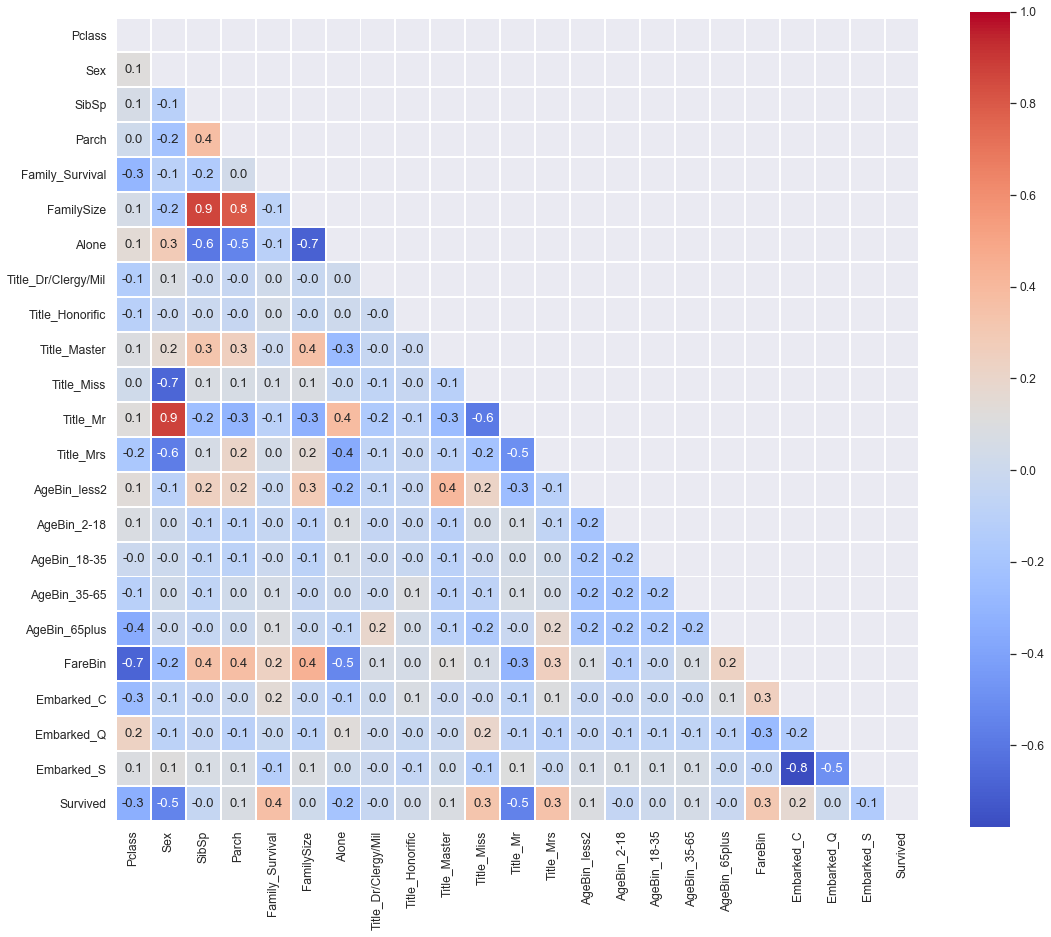

In [119]:
# Correlation matrix

# Display numerical correlations between features on heatmap
sns.set(font_scale=1.1)
correlation_train = v_merged.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1)

plt.show()

In [131]:
# Creating the models

def recover_train_test_target():
    global combined

    y = pd.read_csv('train.csv', usecols=['Survived'])['Survived']
    X = combined.iloc[:idx]
    X_test = combined.iloc[idx:]

    return X, X_test, y


X1, X_test, y = recover_train_test_target()

In [132]:
X=X1.join(y)

In [199]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(n_jobs=-1, solver='newton-cg')

In [200]:
LR.fit(X1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred = gbc.predict(X_test)

In [202]:
name = ["Survived"]
output=pd.DataFrame(LR.predict(X_test), columns = name)

In [203]:
test1 = pd.read_csv("test.csv")
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [204]:
output= output.join(test1["PassengerId"])
output = output.set_index("PassengerId")

In [206]:
output.to_csv("Output.csv")